# Lesson 05 - Learned Embedding

### Playing with Keras and getting familiar with CNN layers
The purpose of this notebook was to getting to know the CNN layers and relevant code via the IMDB data, while each step I made a little "research" to understand how these things work.

Some insights from researchers:

Yoav Goldberg: "Convolutional and pooling layers allow the model to learn to find such local indicators of a topic, regardless of their position."
Also, in average he finds the following hyperparameters fit to best performance:
- Transfer function: rectified linear.
- Kernel sizes: 2, 4, 5.
- Number of filters: 100
- Dropout rate: 0.5
- Weight regularization (L2): 3
- Batch Size: 50
- Update Rule: Adadelta

Yoon Kim: "Unsupervised pre-training of word vectors is an important ingredient in deep learning for NLP"

Ye Zhang and Byron Wallace:
- The choice of pre-trained word2vec and GloVe embeddings differ from problem to problem, and both performed better than using one-hot encoded word vectors.
- The size of the kernel is important and should be tuned for each problem.
- The number of feature maps is also important and should be tuned.
- The 1-max pooling generally outperformed other types of pooling.
- Dropout has little effect on the model performance.

They go on to provide more specific heuristics, as follows:

- Use word2vec or GloVe word embeddings as a starting point and tune them while fitting the model.
- Grid search across different kernel sizes to find the optimal configuration for your problem, in the range 1-10.
- Search the number of filters from 100-600 and explore a dropout of 0.0-0.5 as part of the same search.
- Explore using tanh, relu, and linear activation functions

Most of the code here is based on that [post](http://www.samyzaf.com/ML/imdb/imdb.html)

In [2]:
from keras.datasets import imdb
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
imdb

<module 'keras.datasets.imdb' from 'C:\\Users\\ishay\\Anaconda3\\lib\\site-packages\\keras\\datasets\\imdb.py'>

max_features is the length of the vocabulary we define for all of the data. Depends on how many words we assume there are. Better have too high than too low.

In [4]:
max_features = 5000

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features) # instead on nb_words=

I can use another argument here, which is 'skip_top=', and that to ignore X top most frequent words

In [6]:
# Pip the first reviews
X_train[:3]

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369

This comes already with encoded data. Normally we will have to encode it, for example using one_hot() form keras.preprocessing.text

In [7]:
# To get a sense of the review length
for review in X_train[0:10]:
    print(len(review))
# I can also make a historgam here

218
189
141
550
147
43
123
562
233
130


In [8]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

**Sequence Padding**

Obviously, movie reviews are not expected to have the same text length (number of words). However, neural networks are expecting a fixed size of input vector. We will therefore have to either truncate long reviews or pad short reviews with special word paddings (like with a null word such as "<PAD>" that does not have any meaning, and can be encoded by 0). We use the Keras sequence.pad_sequences utility for this task.

In [9]:
from keras.preprocessing import sequence

In [10]:
maxlen = 400

We define maximum length of 400. It means that posts shoeter than 400 will be filled with 0s, and longer posts are cut.

In [11]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [12]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [11]:
len(X_train[0])

400

Now I will build an example of my own to make sure the pad_sequences is clear

In [12]:
array_for_example = np.array([[7,5,8,9], [2,2,4,2,3,9], [3,6,8,9,1,3,6,8,3,6,9,9]])
new_array_for_example = sequence.pad_sequences(array_for_example, 10)
print(new_array_for_example)

[[0 0 0 0 0 0 7 5 8 9]
 [0 0 0 0 2 2 4 2 3 9]
 [8 9 1 3 6 8 3 6 9 9]]


The first two arrays were padded, and the third one was cut.

**Now defining the model**

In [13]:
from keras.models import Sequential

In [14]:
model = Sequential()

**First Layer - Embedding**

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

- input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

- output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

- input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [15]:
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

[Vectoer Dimentionality](file:///C:/Users/ishay/Documents/Data%20Science/Coursera%20and%20practice/ML_Mastery/NLP/Model%20Improvement%20and%20Best%20Practices/Deep%20Learning%20for%20NLP%20Best%20Practices.html) - a smaller dimensionality works better for more syntactic tasks such as named entity recognition (Melamud et al., 2016) or part-of-speech (POS) tagging (Plank et al., 2016), while a larger dimensionality is more useful for more semantic tasks such as sentiment analysis (Ruder et al., 2016).

So basically I should have picked a larger number than 50. I kept it lower just for computation ease.

In [16]:
embedding_dims = 50

In [17]:
model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen)) # Originally included dropout=0.2

**Second Layer - SpatialDropout1D**

What is dropout?

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. It is a simple Way to Prevent Neural Networks from Overfitting.

Generally, use a small dropout value of 20%-50% of neurons with 20% providing a good starting point. A probability too low has minimal effect and a value too high results in under-learning by the network. A [good explanation](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network) about dropout and why it is done.


The main problem hindering dropout in NLP has been that it could not be applied to recurrent connections.


**SpatialDropout1D** - This version performs the same function as Dropout, however it drops entire 1D feature maps instead of individual elements. If adjacent frames within feature maps are strongly correlated (as is normally the case in early convolution layers) then regular dropout will not regularize the activations and will otherwise just result in an effective learning rate decrease. In this case, SpatialDropout1D will help promote independence between feature maps and should be used instead.

Text is similar-ish to images, and in images pixels are correlated with their neighbors. So, dropping random pixels here and there is not good, since they are correlated to their neighbors. So, SpatialDropout1D works better in these cases, since it drops entire feature-sets (not 100% sure what they are called, but basically drops neighbors together).

For text, replace "pixel" with "word". Dropping random words will not do much and might even hurt you, but dropping entire phrases works best when trying to avoid overfitting.

If you are using a dropout layer after an pre-trained embedding, that the weights are not learnt during training I think that do not make sense use it. However, if the weights are learn during training it may help.


In CNN, usually, a Dropout layer is applied after each pooling layer, and also after your Dense layer. 

In [18]:
model.add(SpatialDropout1D(0.4))

**Third Layer - Convolution**

The width of the kernel in case of character and word representations is the dimension of the entire word embedding or the entire character representation. Thus the only dimension that matters in the case of convolutions in NLP tasks, is the length of the filter or the size of the filter. I found a [good explanation](http://debajyotidatta.github.io/nlp/deep/learning/word-embeddings/2016/11/27/Understanding-Convolutions-In-Text/) about it.

The 1D convolution captures short multi-word features across the sentence

The first argument, **filters**, is the output dimension, meand the number of filters.

The second, **kernel_size**, is the filter length. For example, in the diagram below, the number of filters is 4, and the filter length is different, 2 (red) and 3 (yellow). 

**strides** is how many words does the kernel shift.

[Another good source](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/) for explanation of NLP CNN.

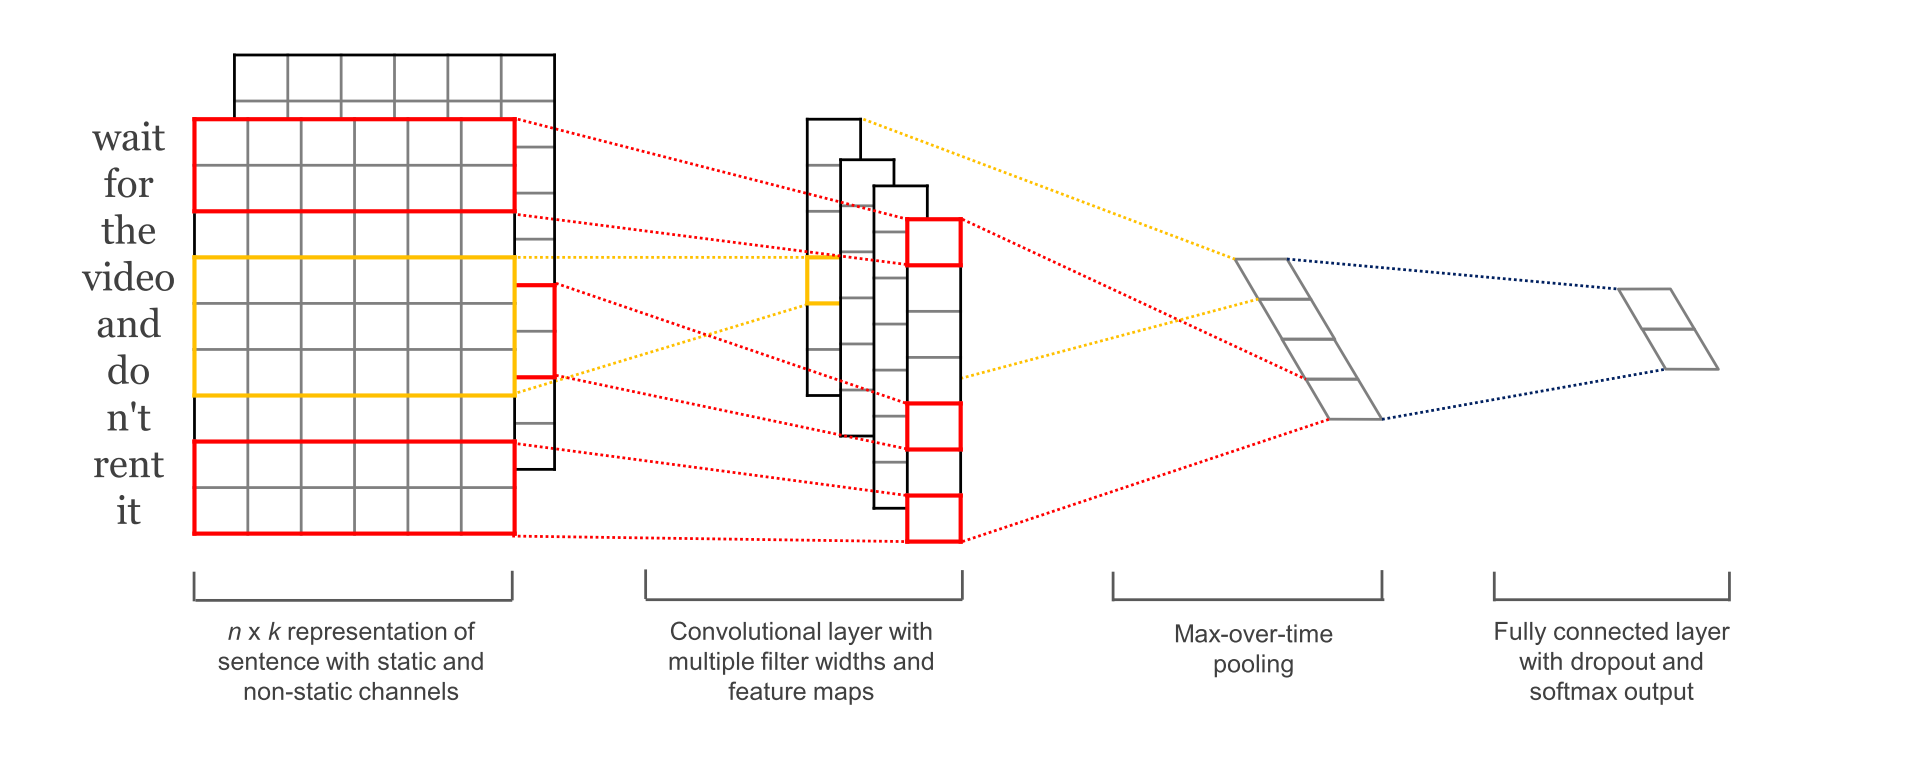

A bit about filter size:

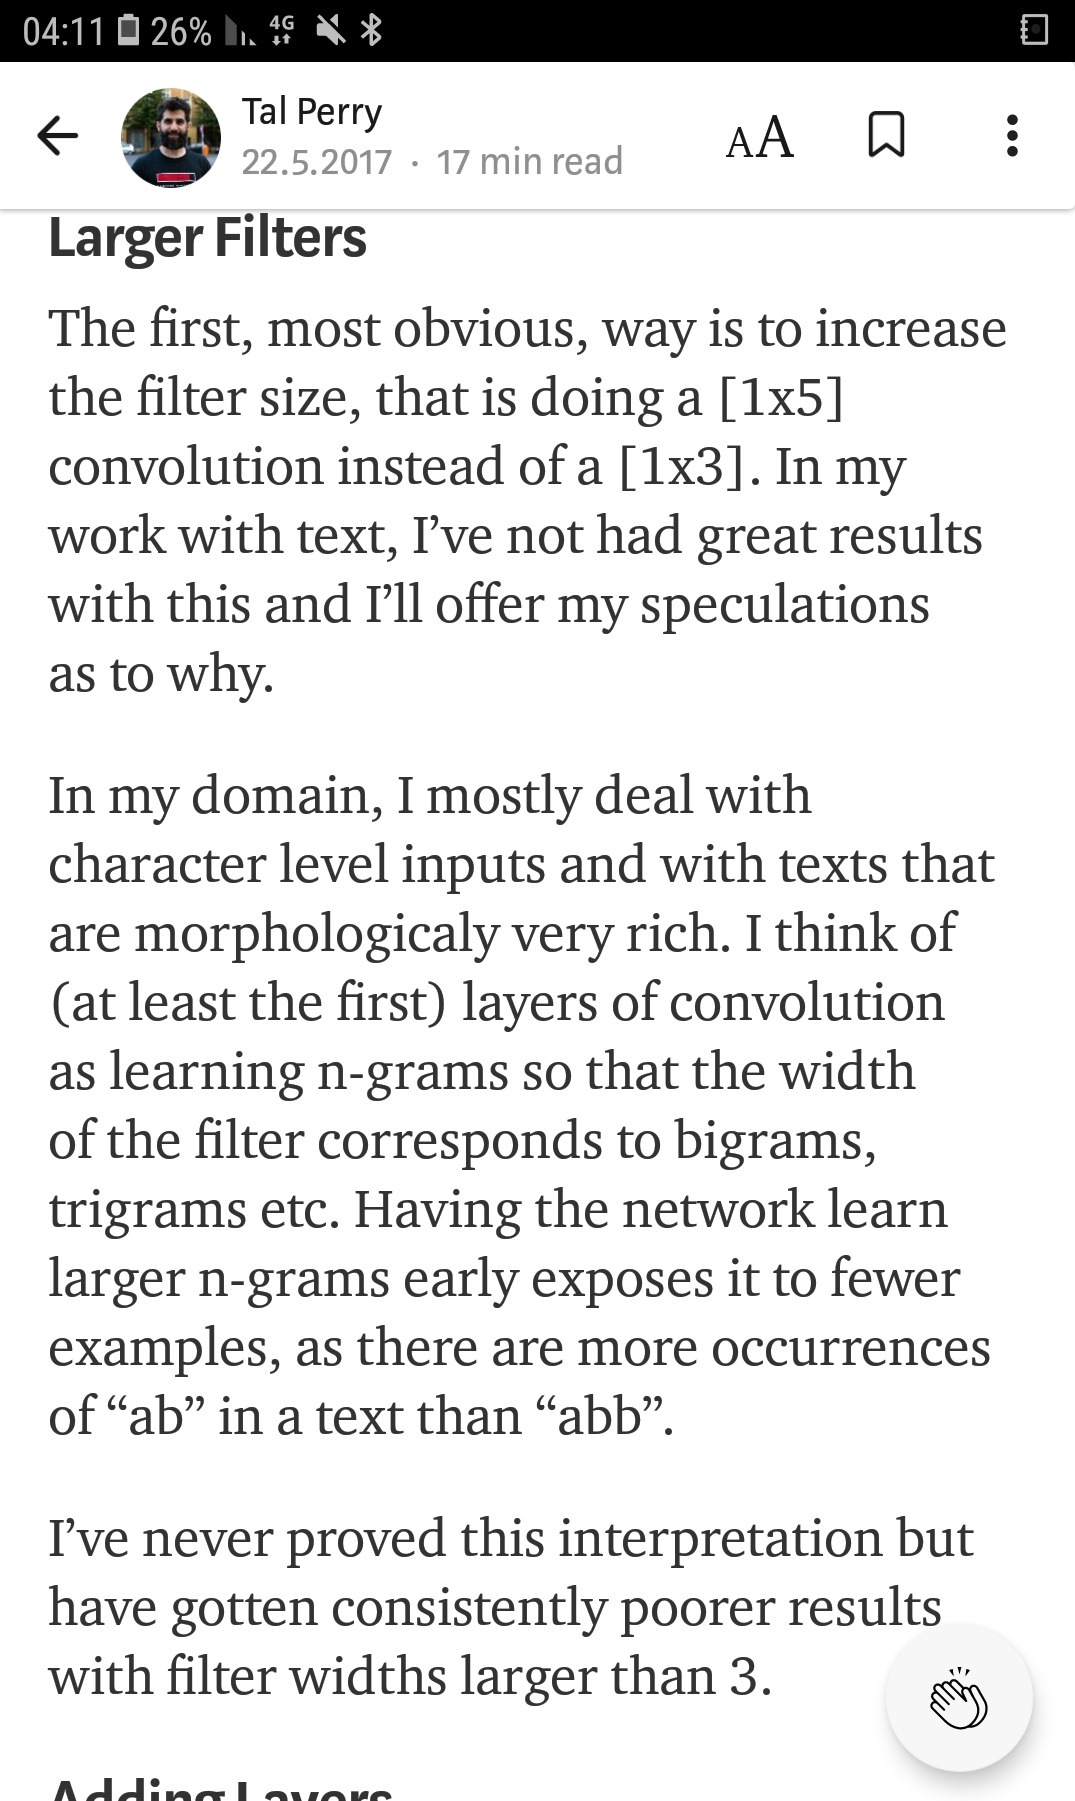

In [19]:
from keras.layers import Convolution1D
from keras.layers import Conv1D
nb_filter = 250
filter_length = 3
model.add(
    Convolution1D(
        filters=nb_filter, # instead of nb_filter=
        kernel_size=filter_length, # instead of filter_length=
        padding='valid', # Instead of border_mode=
        activation='relu',
        strides=1, #instead of subsample_length=
    )
)

Another thing is the activation function. Typically after every convolutional or fully connected layer, an activation (e.g., ReLU) will be applied to all of the outputs

**Maxpooling Layer**

Why pooling? There are a couple of reasons. One property of pooling is that it provides a fixed size output matrix, which typically is required for classification. For example, if you have 1,000 filters and you apply max pooling to each, you will get a 1000-dimensional output, regardless of the size of your filters, or the size of your input. This allows you to use variable size sentences, and variable size filters, but always get the same output dimensions to feed into a classifier.

Pooling also reduces the output dimensionality but (hopefully) keeps the most salient information. You can think of each filter as detecting a specific feature, such as detecting if the sentence contains a negation like “not amazing” for example. If this phrase occurs somewhere in the sentence, the result of applying the filter to that region will yield a large value, but a small value in other regions. By performing the max operation you  are keeping information about whether or not the feature appeared in the sentence, but you are losing information about where exactly it appeared. But isn’t this information about locality really useful? Yes, it  is and it’s a bit similar to what a bag of n-grams model is doing. You are losing global information about locality (where in a sentence something happens), but you are keeping local information captured by your filters, like “not amazing” being very different from “amazing not”.

In our example, the number of filters is 250, so the max pooling will take the max from each filter, and generte a vector of 250 length as an output.

The stride default of the MaxPooling1D is the number of pool_size

**However**, here we use GlobalMaxPooling1D, which is a bit different. The difference is explained [here](https://stackoverflow.com/questions/43728235/what-is-the-difference-between-keras-maxpooling1d-and-globalmaxpooling1d-functi).

So, if the input of this layer (the output of the convolution1D) is 398 by 250 filters, it will take the maximal vector accross the 398. In the MaxPooling1D we end up with a matrix (not a vectoer), therefore we need to flatten it.

GlobalMaxPooling1D takes no arguments.

In [20]:
from keras.layers import GlobalMaxPooling1D

In [21]:
model.add(GlobalMaxPooling1D())

**Dense Layer **(fully connected layer)

Dense layer: A linear operation in which every input is connected to every output by a weight (so there are n_inputs * n_outputs weights - which can be a lot!). Generally followed by a non-linear activation function.

Fully Connected layers are used as final layers in some models because they can directly perform classification.

They also allow the model to be split between layers that do feature extraction (convolutional layers) and layers that do classification on those features (the fully connected ones).

Also note that the use of FC layers is decreasing as one can also use global average pooling followed by a softwax, which allows a fully convolutional network to perform classification without using FC layers.

Using two dense layers is more advised than one layer (first layer learns edge detectors and subsequent layers learn more complex features, and higher level layers encode more abstract features).

**!!! Need to read this** https://cambridgespark.com/content/tutorials/convolutional-neural-networks-with-keras/index.html

In [22]:
from keras.layers import Dense, Dropout, Activation

In [23]:
hidden_dims = 250 # I define the output of the dense (vector length after the layer). It remains 250
model.add(Dense(hidden_dims))

In [24]:
model.add(Dropout(0.4))
model.add(Activation('relu'))

Again, typically after every convolutional or fully connected layer, an activation (e.g., ReLU) will be applied to all of the outputs

Some of the popular choices for activation functions include (plots given below):

identity: σ(z)=z;

sigmoid: especially the logistic function, σ(z)=11+exp(−z), and the hyperbolic tangent, σ(z)=tanhz;

rectified linear (ReLU): σ(z)=max(0,z).

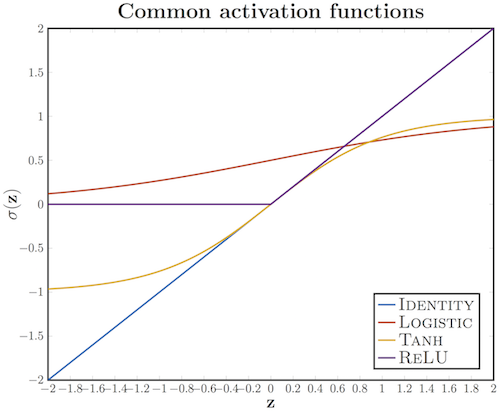

**Output Layer**

On binary classification we use 1 output neuron with sigmoid function, to tell us if this neuron is 0 or 1. If we want probabilities, we will build a dence layer with 2 neurons and softmax function.

Also for multicalss classification we use the softmax.

In [25]:
# #This cell was added after the initial run, to compare results after adding this second FC layer.
# model.add(Dense(8))
# model.add(Activation('relu'))

In [26]:
# This was the only dense layer in the original code
model.add(Dense(1))
model.add(Activation('sigmoid'))

**Compilation**

When we compile the model, we declare the loss function and the optimizer

Arguments:
- Loss: Since out dependent variable is binary, we will have to use logarithmic loss function called ‘binary_crossentropy’, if our dependent variable has more than 2 categories in output then use ‘categorical_crossentropy’
- Optimizer: This is nothing but the algorithm you wanna use to find optimal set of weights. This algorithm is Stochastic Gradient descent(SGD). 'adam' is one of the SGD types.
- metrics: How to measure

Keras has a variety of [loss functions](https://github.com/keras-team/keras/blob/master/keras/losses.py) and out-of-the-box [optimizers](https://keras.io/optimizers/) to choose from.

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

*Fitting the model**

In [28]:
epochs = 4
batch_size = 32
h = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs, # instead of nb_epoch=
    validation_data=(X_test, y_test),
    verbose=1,
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 127s 5ms/step - loss: 0.5633 - acc: 0.7323 - val_loss: 0.4371 - val_acc: 0.8485
Epoch 2/4
25000/25000 [==============================] - 133s 5ms/step - loss: 0.3812 - acc: 0.8710 - val_loss: 0.3551 - val_acc: 0.8708
Epoch 3/4
25000/25000 [==============================] - 133s 5ms/step - loss: 0.2954 - acc: 0.9030 - val_loss: 0.3233 - val_acc: 0.8812
Epoch 4/4
25000/25000 [==============================] - 134s 5ms/step - loss: 0.2400 - acc: 0.9206 - val_loss: 0.3122 - val_acc: 0.8820


In [29]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.958160  ;  loss = 0.166344


In [30]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Validation: accuracy1 = %f  ;  loss1 = %f" % (accuracy, loss))

Validation: accuracy1 = 0.881960  ;  loss1 = 0.312178


On the first trial I got an accuracy of 88.8% -  with only one FC layer.

On the second trial (adding another dense layer) I got 88.6%.

Only one FC layer and changing the dropout to 0.4 resulted in 89.1%.

Now the same parameters with Adadelta instead of adam - 88.0 %

In [31]:
# A good way to view the shape of each layer. Can be printed after the compile function
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

In [ ]:
pred = model.predict(X_test)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# auc = roc_auc_score(y_test, pred)
# print(auc)

The following two cells cannot work, since the model gives the probability after I used the sigmoid function. To get the accuracy/f1 score I need to transform them to 1/0 values

In [ ]:
# accuracy = accuracy_score(y_test, pred)
# print(accuracy)

In [1]:
# f1 = f1_score(y_test, pred)
# print(f1_score)